<a href="https://colab.research.google.com/github/Adolfo-AB/learning-machine-learning/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient Descent with Logistic Regression
Implementation of the gradient descent algorithm with a logistic regression model

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

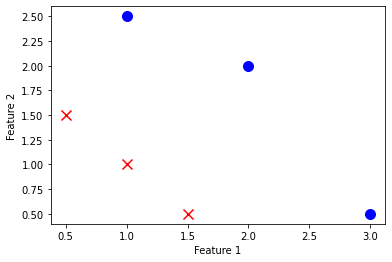

In [ ]:
# Create the training data set
x_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])

# Plot the training data
class_0_idx = np.where(y_train == 0)
class_1_idx = np.where(y_train == 1)

plt.scatter(x_train[class_0_idx, 0], x_train[class_0_idx, 1], marker='x', color='r', s=100)
plt.scatter(x_train[class_1_idx, 0], x_train[class_1_idx, 1], marker='o', color='b', s=100)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()

In [ ]:
def sigmoid(z):
  return 1/(1+np.exp(-z))


def compute_gradient(x, y, w, b):
  m, n = x.shape
  dj_dw = np.zeros(n)
  dj_db = 0

  for i in range(m):
    f_wb = sigmoid(np.dot(x[i],w)+b)
    error = f_wb - y[i]
    for j in range(n):
      dj_dw[j] += error*x[i,j]
    dj_db += error

  return dj_dw/m, dj_db/m


def compute_cost(x, y, w, b):
  cost = 0
  for i in range(x.shape[0]):
    cost += y[i]*np.log(sigmoid(np.dot(x[i],w)+b)) + (1-y[i])*np.log(1-sigmoid(np.dot(x[i],w)+b))

  return -cost/(x.shape[0])


def gradient_descent(x, y, w, b, alpha, num_iters=10000):
  cost_history = []

  for i in range(num_iters):
    dj_dw, dj_db = compute_gradient(x, y, w, b)

    w -= alpha*dj_dw
    b -= alpha*dj_db

    cost_history.append(compute_cost(x, y, w, b))

  return w, b, cost_history

In [ ]:
w_tmp  = np.zeros_like(x_train[0])
b_tmp  = 0.
alpha = 0.1
num_iters = 10000

w_out, b_out, _ = gradient_descent(x_train, y_train, w_tmp, b_tmp, alpha, num_iters) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")


updated parameters: w:[5.28123029 5.07815608], b:-14.222409982019837


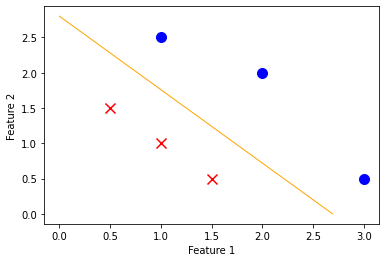

In [ ]:
plt.scatter(x_train[class_0_idx, 0], x_train[class_0_idx, 1], marker='x', color='r', s=100)
plt.scatter(x_train[class_1_idx, 0], x_train[class_1_idx, 1], marker='o', color='b', s=100)

x0 = -b_out/w_out[0]
x1 = -b_out/w_out[1]
plt.plot([0,x0],[x1,0], c="orange", lw=1)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()